In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/train.csv.zip")

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
df.shape

(9800, 18)

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
print(df.describe())

            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [20]:
# Dataset Cleaning & Preprocessing

# Check missing values
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [21]:
# Handle missing values (if any)

df.fillna(0,inplace=True)

In [22]:

# Convert date columns to datetime

df['Order Date']=pd.to_datetime(df['Order Date'],dayfirst=True)
df['Ship Date']=pd.to_datetime(df['Ship Date'],dayfirst=True)

In [23]:
# General Sales


# What is the total sales of the superstore?
total_sales = df['Sales'].sum()


# How many unique orders are there?
total_orders = df['Order ID'].nunique()


# What is the average sales value?
avg_sales = df['Sales'].mean()

print(f"Total Sales: {total_sales}")
print(f"Total Orders: {total_orders}")
print(f"Average Sales per Order: {avg_sales}")

Total Sales: 2261536.7827000003
Total Orders: 4922
Average Sales per Order: 230.7690594591837


Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


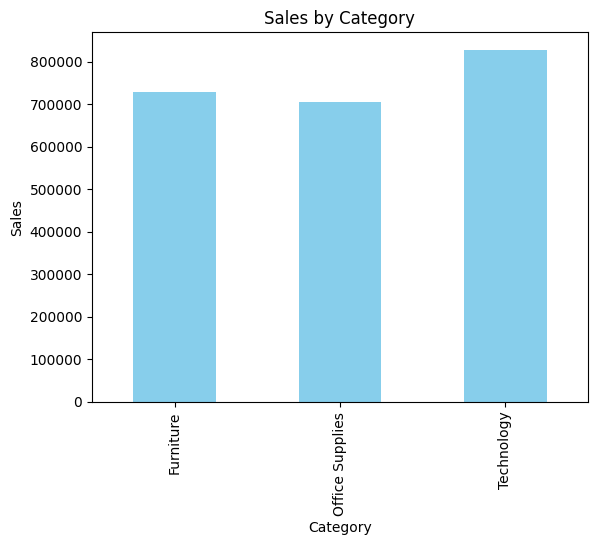

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64


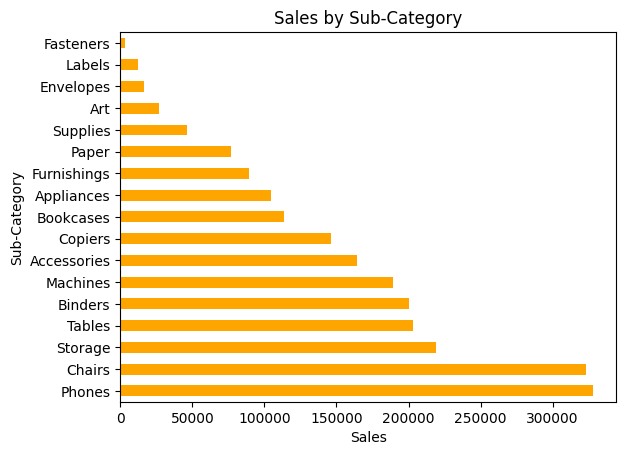

In [25]:
# Category & Sub-Category Analysis


# Which category has the highest sales?
category_sales = df.groupby('Category')['Sales'].sum()
print(category_sales)

category_sales.plot(kind='bar', title='Sales by Category', color='skyblue')
plt.ylabel("Sales")
plt.show()



subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(subcat_sales)

subcat_sales.plot(kind='barh', title='Sales by Sub-Category', color='orange')
plt.xlabel("Sales")
plt.show()

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


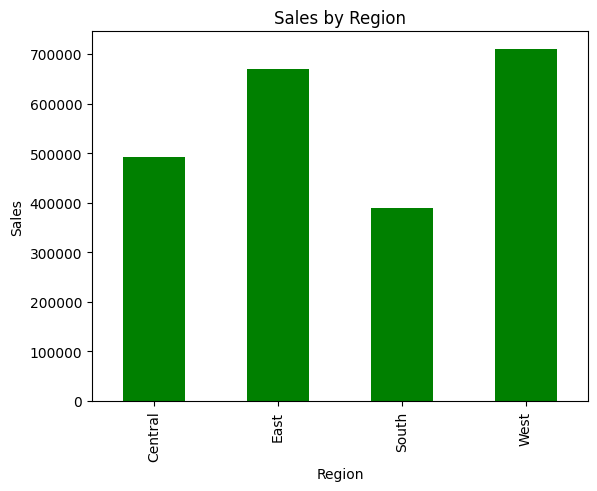

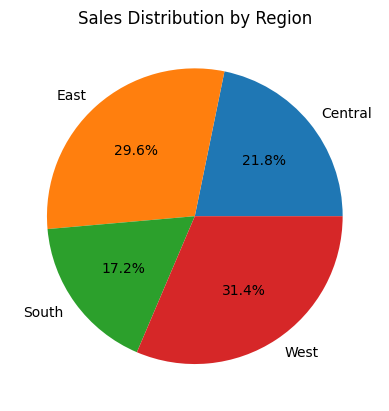

In [27]:
# Regional Analysis

# Which region generates the highest sales?
region_sales=df.groupby('Region')['Sales'].sum()
print(region_sales)


region_sales.plot(kind='bar', title='Sales by Region', color='green')
plt.ylabel("Sales")
plt.show()

# Pie chart for regional sales
region_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Region')
plt.ylabel('')
plt.show()


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


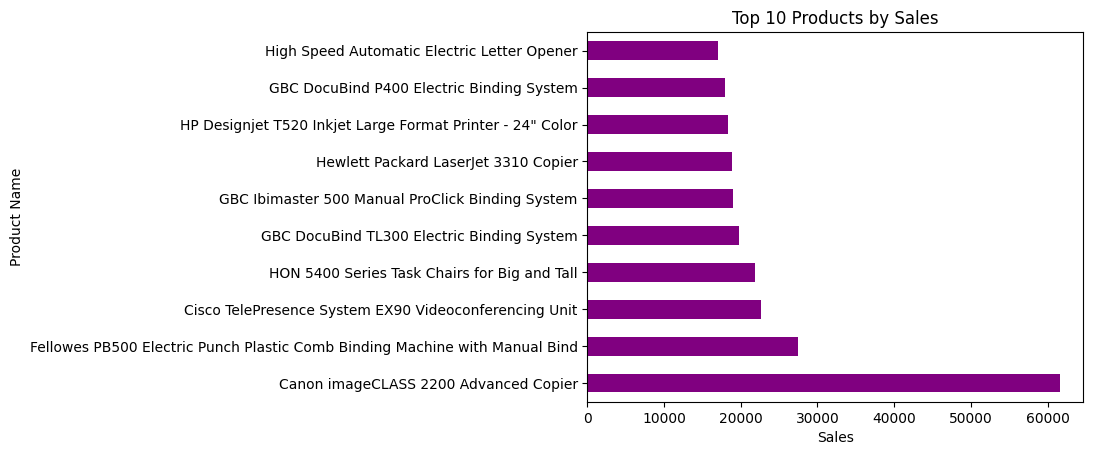

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Acme Serrated Blade Letter Opener                                   7.632
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Name: Sales, dtype: float64


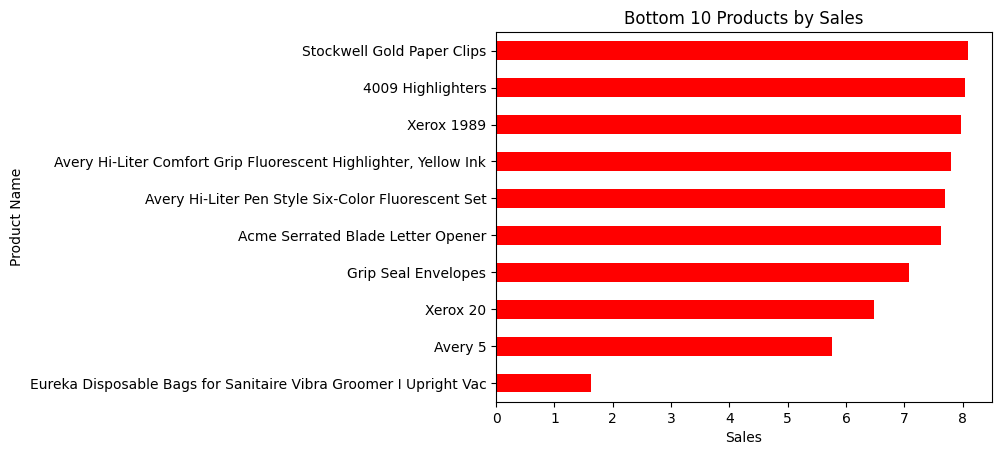

In [33]:
# Product-Level Analysis


# Which are the top 10 products by total sales?
top_product=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_product)


top_product.plot(kind='barh', title='Top 10 Products by Sales', color='purple')
plt.xlabel("Sales")
plt.show()



# Which are the bottom 10 products by total sales?
bottom_products = df.groupby('Product Name')['Sales'].sum().sort_values().head(10)
print(bottom_products)

bottom_products.plot(kind='barh', title='Bottom 10 Products by Sales', color='red')
plt.xlabel("Sales")
plt.show()




/tmp/ipython-input-372328343.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


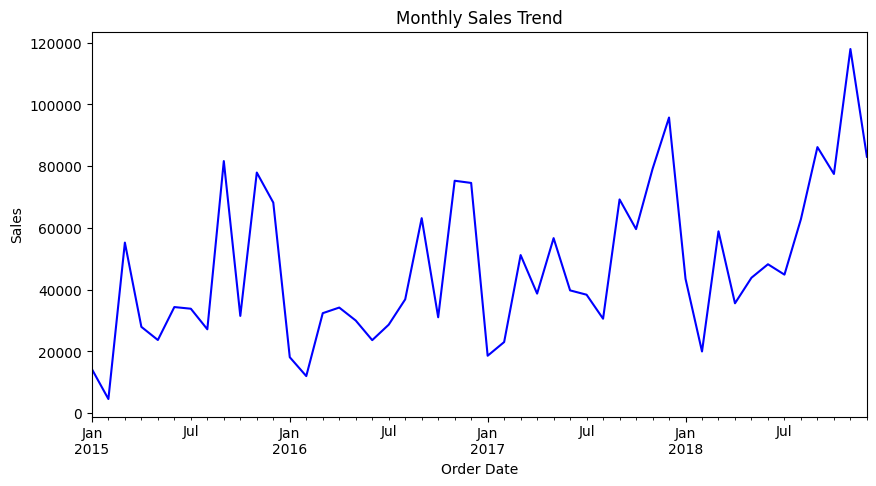

/tmp/ipython-input-372328343.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df['Sales'].resample('Y').sum()


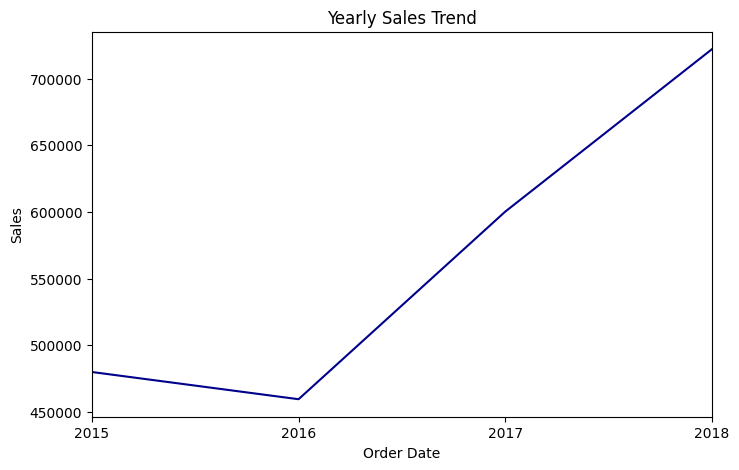

In [34]:
# Time-Based Sales Trends



df.set_index('Order Date', inplace=True)

# What is the monthly sales trend over time?
monthly_sales = df['Sales'].resample('M').sum()
monthly_sales.plot(title='Monthly Sales Trend', figsize=(10,5), color='blue')
plt.ylabel("Sales")
plt.show()

# What is the yearly sales trend?
yearly_sales = df['Sales'].resample('Y').sum()
yearly_sales.plot(title='Yearly Sales Trend', figsize=(8,5), color='darkblue')
plt.ylabel("Sales")
plt.show()


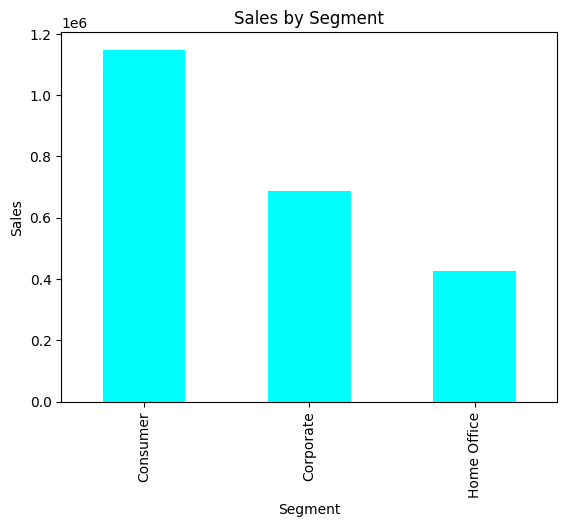

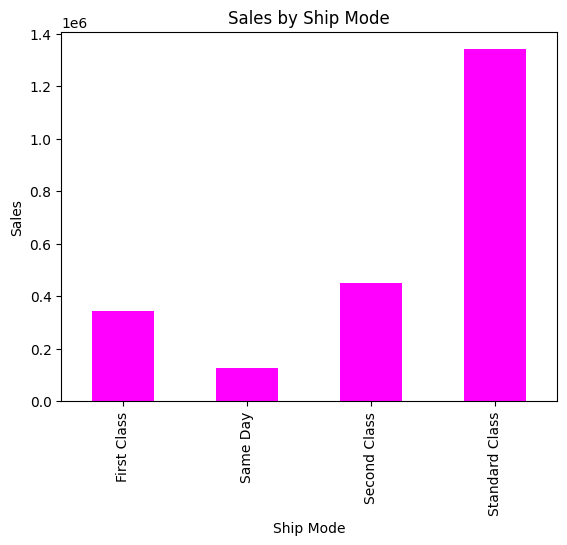

In [35]:
# Segment & Ship Mode Analysis

# Which customer segment generates the highest sales?
segment_sales = df.groupby('Segment')['Sales'].sum()
segment_sales.plot(kind='bar', title='Sales by Segment', color='cyan')
plt.ylabel("Sales")
plt.show()


#  Which shipping mode is used most frequently for sales?
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum()
shipmode_sales.plot(kind='bar', title='Sales by Ship Mode', color='magenta')
plt.ylabel("Sales")
plt.show()

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


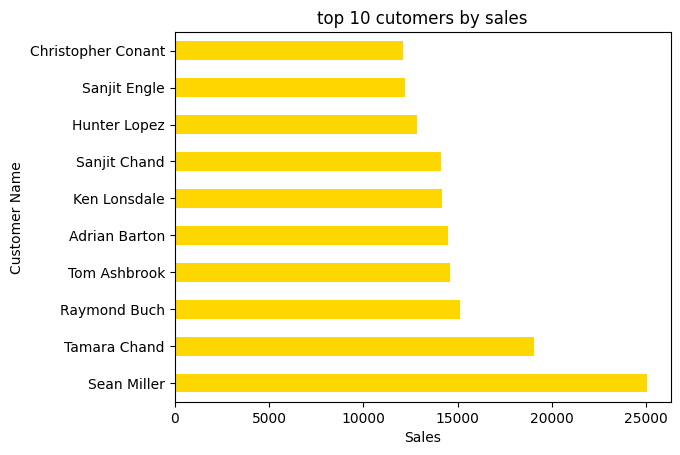

In [37]:


# Top customers by sales?
top_customer=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customer)


top_customer.plot(kind='barh',title='top 10 cutomers by sales',color='gold')
plt.xlabel("Sales")
plt.show()


